In [1]:
from scripts.python_functions import *

pd.options.display.max_columns = None
pd.options.display.max_rows = 20

loldata = load_and_process('../data/raw/lolchallengertotal.csv')
loldata.head(200)

,gameID,gameTime,gameDuration,gameLength,winner,firstBlood,firstTower,firstDragon,firstBaron,firstInhibitor,blueTowerKills,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWard,blueWardKills,blueKills,blueDeaths,blueAssists,blueTotalLevel,blueAvgLevel,blueChampionDamage,blueObjectiveDamage,blueTotalHealing,blueTotalGold,blueTotalCS,blueJungleCS,blueKillingSpree,redTowerKills,redDragonKills,redBaronKills,redInhibitorKills,redWard,redWardKills,redKills,redDeaths,redAssists,redTotalLevel,redAvgLevel,redChampionDamage,redObjectiveDamage,redTotalHealing,redTotalGold,redTotalCS,redJungleCS,redKillingSpree
0,4247263043,22:03,1323,medium,red,blue,red,red,none,red,0,0,0,0,38,13,15,31,22,56,11.2,56039,5675,31035,37001,440,105,4,9,3,0,1,50,17,31,15,68,64,12.8,73016,60463,38711,49832,533,138,8
1,4247155821,21:57,1317,medium,blue,red,red,blue,none,none,4,2,0,0,57,18,19,8,31,63,12.6,60243,45303,26397,41072,531,111,3,2,0,0,0,46,18,8,19,8,59,11.8,44218,14105,24829,37136,571,134,3
2,4243963257,15:32,932,short,red,red,red,red,none,red,0,0,0,0,28,7,5,20,8,42,8.4,24014,5651,6567,22929,306,64,0,5,2,0,1,40,9,20,5,20,50,10.0,30797,45201,12589,35364,400,89,5
3,4241678498,34:58,2098,medium,red,red,red,blue,blue,none,2,1,1,0,129,39,26,36,45,80,16.0,101607,31019,24718,63447,774,226,3,6,3,1,0,96,56,36,26,72,84,16.8,125866,88202,65312,70528,832,205,9
4,4241538868,39:04,2344,medium,blue,blue,blue,blue,blue,blue,11,2,2,3,114,35,27,40,47,83,16.6,134826,95287,37161,74955,831,252,5,6,3,1,1,100,43,40,27,83,85,17.0,131536,64141,86431,74596,794,227,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,4255761502,16:02,962,short,red,blue,red,red,none,none,0,0,0,0,33,11,13,27,17,46,9.2,35698,4252,8264,27382,306,78,1,3,1,0,0,46,11,27,13,23,52,10.4,42472,21139,9881,36072,432,80,6
198,4255663162,27:12,1632,medium,red,red,red,blue,red,red,3,1,0,0,60,28,16,25,33,64,12.8,67495,26149,21165,45386,631,144,5,9,2,1,2,77,20,25,16,58,71,14.2,86546,65508,34539,54256,624,123,6
199,4255601634,24:07,1447,medium,blue,red,blue,blue,blue,blue,9,2,1,2,74,23,37,17,61,69,13.8,79831,53206,44931,54369,520,144,8,0,2,0,0,53,16,17,37,24,58,11.6,65595,23801,12868,40991,505,129,2
200,4255379515,29:10,1750,medium,blue,blue,blue,blue,none,blue,9,4,0,1,90,43,39,13,73,73,14.6,99457,73235,68713,61918,666,197,8,2,0,0,0,100,33,13,39,28,66,13.2,80460,17099,21625,46806,667,118,2


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = 'ticks', font_scale = 1.3)

In [7]:
#Total number of Korean challenger games.
print("Total Number of KR Challenger Games: {}".format(len(loldata)))

Total Number of KR Challenger Games: 26737


In [8]:
#Wins on each side depending on the game length (dataframe).
loldata_grouped = loldata.groupby(['gameLength', 'winner'])['gameID'].count()
loldata_grouped

gameLength  winner
long        blue       198
            red        173
medium      blue      9480
            red       9507
short       blue      3776
            red       3603
Name: gameID, dtype: int64

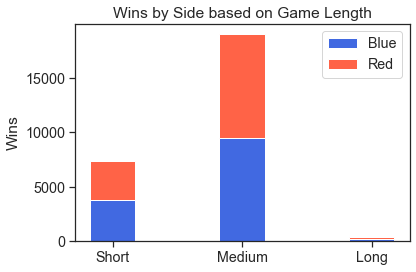

In [9]:
#Wins on each side depending on the game length (stacked bargraph).
N = 3
blueWins = (loldata_grouped['short']['blue'], loldata_grouped['medium']['blue'], loldata_grouped['long']['blue'])
redWins = (loldata_grouped['short']['red'], loldata_grouped['medium']['red'], loldata_grouped['long']['red'])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, blueWins, width, color = 'royalblue')
p2 = plt.bar(ind, redWins, width, bottom = blueWins, color = 'tomato')

plt.ylabel('Wins')
plt.title('Wins by Side based on Game Length')
plt.xticks(ind, ('Short', 'Medium', 'Long'))
plt.legend((p1[0], p2[0]), ('Blue', 'Red'))

plt.show()

In [10]:
print("Average Game Duration: {:.0f}:{:.0f} minutes".format(
    (loldata['gameDuration'].mean()/60 - loldata['gameDuration'].mean()/60%1),
    (loldata['gameDuration'].mean()/60%1 * 60)))

Average Game Duration: 24:16 minutes


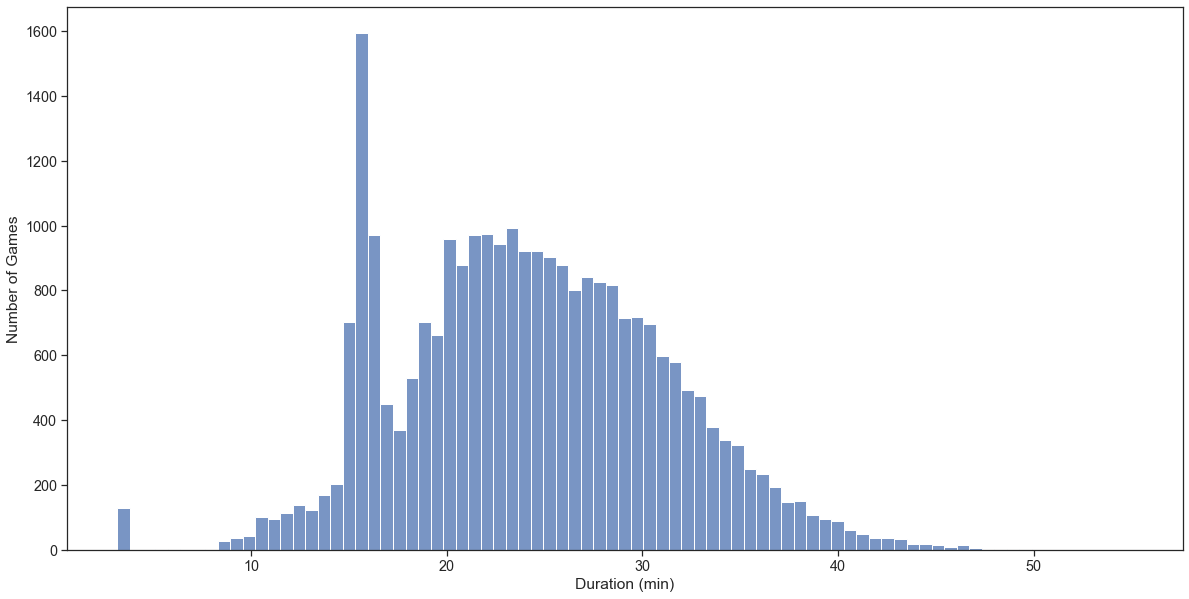

In [11]:
#Determine when games are decided.
plt.figure(figsize=(20,10))
sns.histplot(loldata['gameDuration']/60)
sns.set(font_scale = 2)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Games')

plt.show()

In [24]:
grouped_firstBlood = loldata.groupby(['winner', 'firstBlood'])['gameID'].count()
print(grouped_firstBlood)

firstBlood_win = grouped_firstBlood['blue']['blue'] + grouped_firstBlood['red']['red']
firstBlood_loss = grouped_firstBlood['blue']['red'] + grouped_firstBlood['red']['blue']

print("")
print("The percentage of games won after getting first blood is {:.2f}%.".format(firstBlood_win/(firstBlood_win + firstBlood_loss)*100))

winner  firstBlood
blue    blue          8163
        none            33
        red           5258
red     blue          5313
        red           7970
Name: gameID, dtype: int64

The percentage of games won after getting first blood is 60.41%.


In [25]:
grouped_firstTower = loldata.groupby(['winner', 'firstTower'])['gameID'].count()
print(grouped_firstTower)

firstTower_win = grouped_firstTower['blue']['blue'] + grouped_firstTower['red']['red']
firstTower_loss = grouped_firstTower['blue']['red'] + grouped_firstTower['red']['blue']

print("")
print("The percentage of games won after getting first tower is {:.2f}%.".format(firstTower_win/(firstTower_win + firstTower_loss)*100))

winner  firstTower
blue    blue          10088
        none            137
        red            3229
red     blue           4053
        none             10
        red            9220
Name: gameID, dtype: int64

The percentage of games won after getting first tower is 72.61%.


In [27]:
grouped_firstDragon = loldata.groupby(['winner', 'firstDragon'])['gameID'].count()
print(grouped_firstDragon)

firstDragon_win = grouped_firstDragon['blue']['blue'] + grouped_firstDragon['red']['red']
firstDragon_loss = grouped_firstDragon['blue']['red'] + grouped_firstDragon['red']['blue']

print("")
print("The percentage of games won after getting first dragon is {:.2f}%.".format(firstDragon_win/(firstDragon_win + firstDragon_loss)*100))

winner  firstDragon
blue    blue           7236
        none           1246
        red            4972
red     blue           3696
        none           1012
        red            8575
Name: gameID, dtype: int64

The percentage of games won after getting first dragon is 64.59%.


In [28]:
grouped_firstBaron = loldata.groupby(['winner', 'firstBaron'])['gameID'].count()
print(grouped_firstBaron)

firstBaron_win = grouped_firstBaron['blue']['blue'] + grouped_firstBaron['red']['red']
firstBaron_loss = grouped_firstBaron['blue']['red'] + grouped_firstBaron['red']['blue']

print("")
print("The percentage of games won after getting first baron is {:.2f}%.".format(firstBaron_win/(firstBaron_win + firstBaron_loss)*100))

winner  firstBaron
blue    blue          5403
        none          6808
        red           1243
red     blue          1164
        none          6189
        red           5930
Name: gameID, dtype: int64

The percentage of games won after getting first baron is 82.48%.


In [29]:
grouped_firstInhibitor = loldata.groupby(['winner', 'firstInhibitor'])['gameID'].count()
print(grouped_firstInhibitor)

firstInhibitor_win = grouped_firstInhibitor['blue']['blue'] + grouped_firstInhibitor['red']['red']
firstInhibitor_loss = grouped_firstInhibitor['blue']['red'] + grouped_firstInhibitor['red']['blue']

print("")
print("The percentage of games won after getting first inhibitor is {:.2f}%.".format(firstInhibitor_win/(firstInhibitor_win + firstInhibitor_loss)*100))

winner  firstInhibitor
blue    blue              9073
        none              3684
        red                697
red     blue               804
        none              3799
        red               8680
Name: gameID, dtype: int64

The percentage of games won after getting first inhibitor is 92.20%.
